# Notebook for visualization of iterative optimization of routes

In [1]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from collections import defaultdict
from IPython.display import clear_output
import time

In [8]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(os.path.join(os.getcwd(), '..'))
import vrp_algorithms_lib.analytical_tools.viz as my_viz
import vrp_algorithms_lib.common_tools.file_utils as file_utils
from vrp_algorithms_lib.problem.models import ProblemDescription, Routes
from vrp_algorithms_lib.problem.penalty_calculator import PenaltyCalculator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
test_name = 'large_test_2'
iterations_number = 30000000

test_path = os.path.join('../test_data/inputs/', test_name)

problem_description_path = os.path.join(test_path, 'problem_description.json')
problem_description_json = file_utils.read_json(problem_description_path)
problem_description: ProblemDescription = ProblemDescription.parse_obj(problem_description_json)

path_to_request = os.path.join(test_path, 'request.json')

path_to_result_directory = os.path.join('../test_data/results/annealing/', test_name)

routes_path = os.path.join(path_to_result_directory, f'{iterations_number}_iterations_routes_1.json')
routes_json = file_utils.read_json(routes_path)
routes: Routes = Routes.parse_obj(routes_json)

path_to_checkpoints = os.path.join(path_to_result_directory, f'{iterations_number}_iterations_checkpoints_1.json')
path_to_penalty_history = os.path.join(path_to_result_directory, f'{iterations_number}_iterations_penalty_history_1.json')

In [11]:
request = file_utils.read_json(path_to_request)
checkpoints = file_utils.read_json(path_to_checkpoints)
penalty_history = file_utils.read_json(path_to_penalty_history)

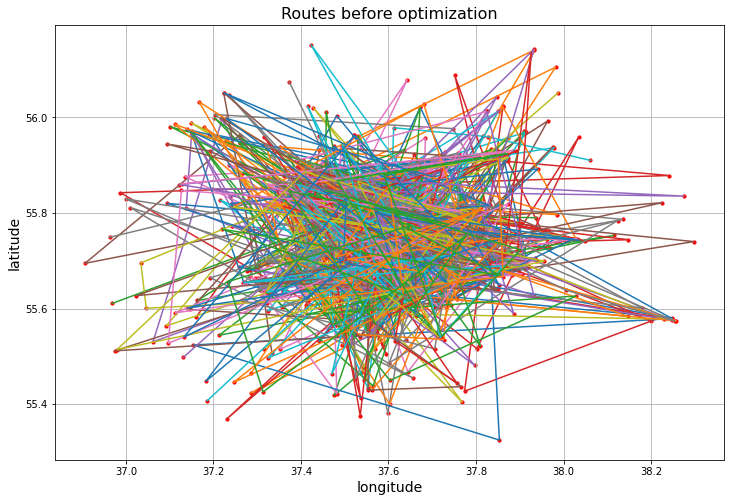

In [12]:
my_viz.plot_routes(request, checkpoints[0]['routes'], title='Routes before optimization', legend=False)

In [15]:
penalty = PenaltyCalculator.calculate(problem_description, routes)

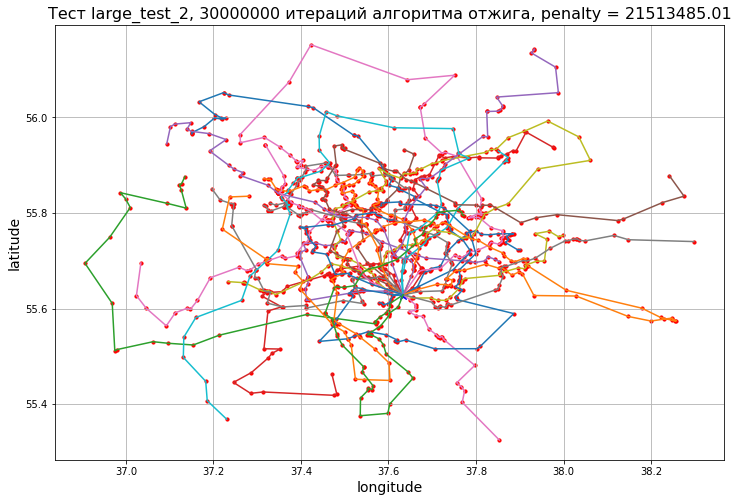

In [17]:
my_viz.plot_routes(request, checkpoints[-1]['routes'], title=f'Тест {test_name}, {iterations_number} итераций алгоритма отжига, penalty = {round(penalty, 2)}', legend=False)

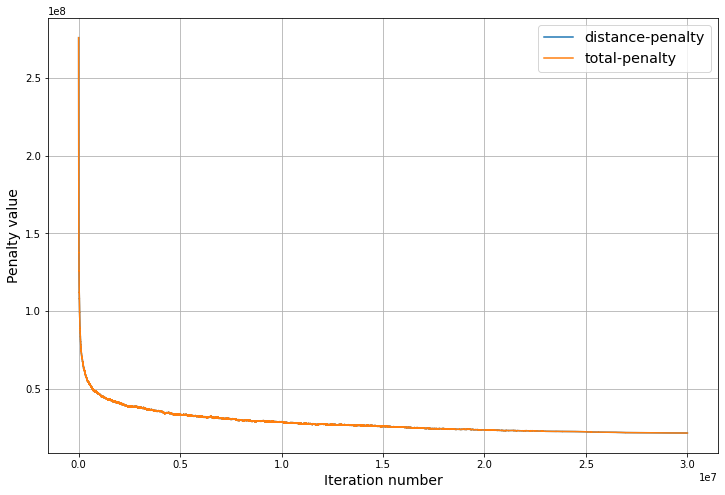

In [18]:
my_viz.plot_penalty_history(penalty_history, skip_first_n=0)

### Medium_test_1

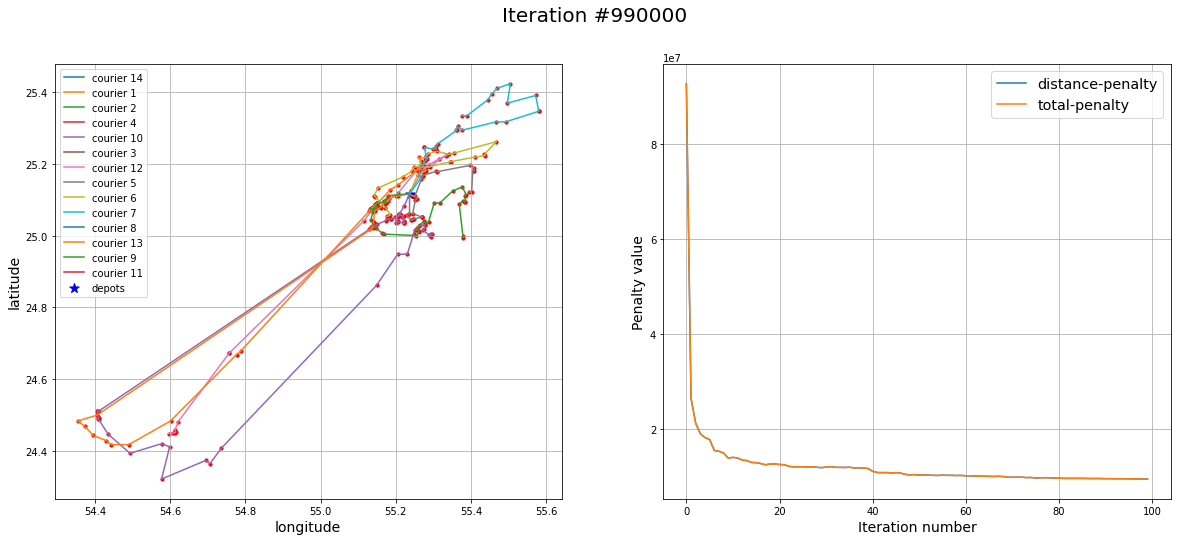

In [96]:
my_viz.plot_checkpoints(request, checkpoints)